<a href="https://colab.research.google.com/github/saurabh289/FAC_Stock-price-prediction/blob/main/FAC_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


**FAC_ Stock-Price-Prediction_ Assignment 1 **


---


**This file contains 5 ML models for stock prediction of Amazon(AMAZ)**

{PS: Similar ML models for other two firms are saved as separate files in the same repository: Link: https://github.com/saurabh289/FAC_Stock-price-prediction }


---



In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split



In [5]:
from google.colab import files
files.upload()

Saving AMZN.csv to AMZN.csv


{'AMZN.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2011-06-13,186.809998,192.449997,181.589996,186.369995,186.369995,26501200\n2011-06-20,185.960007,195.199997,185.570007,192.550003,192.550003,18368100\n2011-06-27,194.500000,210.270004,194.029999,209.490005,209.490005,22991700\n2011-07-04,208.759995,218.320007,208.729996,218.279999,218.279999,13045600\n2011-07-11,216.740005,217.500000,209.289993,212.869995,212.869995,20224400\n2011-07-18,212.529999,220.199997,208.289993,216.520004,216.520004,18845200\n2011-07-25,215.490005,227.199997,210.350006,222.520004,222.520004,36684600\n2011-08-01,225.000000,227.449997,194.839996,202.699997,202.699997,37176600\n2011-08-08,196.399994,205.089996,190.050003,202.300003,202.300003,42698600\n2011-08-15,202.059998,205.279999,177.550003,178.929993,178.929993,29502300\n2011-08-22,182.830002,199.720001,177.100006,199.270004,199.270004,27985500\n2011-08-29,202.820007,217.639999,202.550003,210.000000,210.000000,27339000\n2011-09-05,204.770004,220.6399

In [6]:
data = pd.read_csv('AMZN.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-06-13,186.809998,192.449997,181.589996,186.369995,186.369995,26501200
1,2011-06-20,185.960007,195.199997,185.570007,192.550003,192.550003,18368100
2,2011-06-27,194.500000,210.270004,194.029999,209.490005,209.490005,22991700
3,2011-07-04,208.759995,218.320007,208.729996,218.279999,218.279999,13045600
4,2011-07-11,216.740005,217.500000,209.289993,212.869995,212.869995,20224400
...,...,...,...,...,...,...,...
517,2021-05-10,3282.320068,3283.000000,3127.370117,3222.899902,3222.899902,22067100
518,2021-05-17,3245.929932,3312.000000,3184.000000,3203.080078,3203.080078,15970100
519,2021-05-24,3215.500000,3295.729980,3210.500000,3223.070068,3223.070068,12958900
520,2021-05-31,3243.500000,3250.979980,3184.030029,3206.219971,3206.219971,9088500


In [8]:
# n = len(data)
data['Date'] = pd.to_datetime(data.Date)

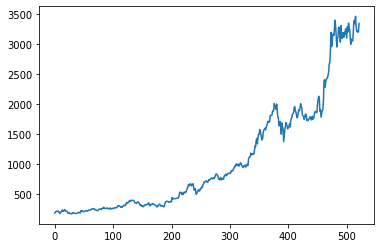

In [7]:
data['Adj Close'].plot()

In [55]:
X = data[['Open', 'High', 'Low', 'Volume']]
Y = data['Adj Close']

X = X.values
Y = Y.values
# print(X)
# print(Y)

In [56]:
Xtr,Xts,Ytr,Yts = train_test_split(X,Y)

In [19]:
lin_model = LinearRegression()
lin_model.fit(Xtr,Ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lin_pred = lin_model.predict(Xts)
lin_pred

array([ 261.06987847,  828.60185364,  302.76155106, 3109.49154435,
       1742.73540876, 1129.00427648,  626.11264427,  185.24326411,
       1563.40225064, 1602.49906739,  968.70737881, 3242.99122787,
        401.0966091 ,  737.1366732 ,  550.75715885,  956.61555827,
        427.23318376,  444.25195276, 1772.15025447,  328.19972697,
        314.63400154, 3148.53233609,  807.20963876, 1913.93180538,
       1426.6778367 ,  323.4414727 , 1877.93626685,  724.95043855,
        321.83458329,  309.96817374, 1548.88925346,  835.12704573,
        747.36531471, 3208.44629776,  270.33859446,  299.42482014,
       3303.31444922, 1791.31848791, 1459.2826642 ,  435.39540531,
       3111.59879592, 1945.85517879,  375.88216094,  997.9372553 ,
        653.15618457,  905.78267374,  368.30536968,  357.89772174,
        236.27885871, 1517.55131895, 3292.95766557,  765.75541163,
       2006.04403426, 3266.53064087,  618.61217446,  851.36508146,
        299.4842678 ,  721.99324067,  850.30692346,  592.59707

In [30]:
lin_compare = pd.DataFrame({'Actual':Yts, 'Predicted':lin_pred})
lin_compare

,Actual,Predicted
0,263.630005,261.069878
1,822.960022,828.601854
2,303.640015,302.761551
3,3128.810059,3109.491544
4,1745.719971,1742.735409
...,...,...
126,312.549988,311.785925
127,539.799988,537.046285
128,3148.020020,3126.265241
129,3249.899902,3305.388331


In [31]:
lin_model.score(Xts,Yts)

0.9995055534081421



---


---

**Ridge Model for Amazon(AMAZ)**

---



In [32]:
rid_model = Ridge()
rid_model.fit(Xtr,Ytr)
rid_pred = rid_model.predict(Xts)

In [34]:
rid_compare = pd.DataFrame({'Actual':Yts, 'Predicted':rid_pred})
rid_compare

,Actual,Predicted
0,263.630005,261.069889
1,822.960022,828.601894
2,303.640015,302.761575
3,3128.810059,3109.491863
4,1745.719971,1742.735396
...,...,...
126,312.549988,311.785943
127,539.799988,537.046297
128,3148.020020,3126.265345
129,3249.899902,3305.388207


In [35]:
rid_model.score(Xts,Yts)

0.9995055532992623



---



---

**Elastic-Net model for Amazon(AMAZ)**

---



In [43]:
els_model = ElasticNet()
els_model.fit(Xtr,Ytr)
els_pred = els_model.predict(Xts)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147130.13153796675, tolerance: 33709.63756958711
  positive)


In [44]:
els_compare = pd.DataFrame({'Actual':Yts, 'Predicted':els_pred})
els_compare

,Actual,Predicted
0,263.630005,266.048837
1,822.960022,832.007304
2,303.640015,305.261037
3,3128.810059,3165.218095
4,1745.719971,1730.217135
...,...,...
126,312.549988,316.116204
127,539.799988,539.270337
128,3148.020020,3130.990102
129,3249.899902,3268.646914


In [45]:
els_model.score(Xts,Yts)

0.9992771297687028



---



---

**Lasso model for Amzon**

---



In [47]:
lss_model = Lasso()
lss_model.fit(Xtr,Ytr)
lss_pred = lss_model.predict(Xts)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147123.79880000022, tolerance: 33709.63756958711
  positive)


In [48]:
lss_compare = pd.DataFrame({'Actual':Yts, 'Predicted':lss_pred})
lss_compare

,Actual,Predicted
0,263.630005,266.048397
1,822.960022,832.008887
2,303.640015,305.262044
3,3128.810059,3165.221996
4,1745.719971,1730.219343
...,...,...
126,312.549988,316.116435
127,539.799988,539.270651
128,3148.020020,3130.994397
129,3249.899902,3268.648266


In [49]:
lss_model.score(Xts,Yts)

0.9992770699963353



---



---
**Decision Tree Regressor model for Amazon**

---




In [62]:
ds_model = DecisionTreeRegressor()
ds_model.fit(Xtr,Ytr)
ds_pred = ds_model.predict(Xts)

In [63]:
ds_compare = pd.DataFrame({'Actual':Yts, 'Predicted':ds_pred})
ds_compare

,Actual,Predicted
0,780.369995,760.140015
1,253.270004,258.510010
2,1229.140015,1168.359985
3,2410.219971,2375.000000
4,223.990005,224.740005
...,...,...
126,2134.870117,2095.969971
127,3201.649902,3182.699951
128,237.320007,232.750000
129,3249.899902,3203.080078


In [64]:
ds_model.score(Xts,Yts)

0.9985571254958515